### 이미지 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
# os(Operating System) : 파일이나 디렉토리 등 운영체제에서 
#                        제공되는 여러 기능을 파이썬에서 
#                        수행하게 해주는 라이브러리
import os

In [2]:
go_dir = '고윤정/'
ggo_dir = '꼬부기/'
fox_dir = '여우/'
pick_dir = '피카츄/'

In [3]:
go_fnames = os.listdir(go_dir)
ggo_fnames = os.listdir(ggo_dir)
fox_fnames = os.listdir(fox_dir)
pick_fnames = os.listdir(pick_dir)

In [4]:
test_path = os.path.join(go_dir, go_fnames[50])
test_path

'고윤정/144.png'

In [5]:
# 폴더 경로와 파일명, 이미지 사이즈를 매개변수로 받아서 이미지를 불러와
# 배율로 만들어주는 사용자 정의 함수 생성하기
def load_images(folder_path, file_names, img_size_shape=(224, 224)):
    images = []
    for i in file_names:
        # 카테고리 별, 각 파일명들의 전체 경로를 설정
        path = os.path.join(folder_path, i)
        # 이미지 경로에 맞게 불러와서 사이즈를 변경시키고 컬러이미지로 저장
        img = Image.open(path).resize(img_size_shape).convert('RGB')
        # 이미지를 배열로 변롼시킨 데이터를 바로 비어있는 리스트에 저장
        images.append(np.array(img))
    # 리스트 자체도 배열로 변환시켜 반환
    return np.array(images)

In [6]:
train_go = load_images(go_dir, go_fnames)
train_ggo = load_images(ggo_dir, ggo_fnames)
train_fox = load_images(fox_dir, fox_fnames)
train_pick = load_images(pick_dir, pick_fnames)

In [7]:
print(train_go.shape)
print(train_ggo.shape)
print(train_fox.shape)
print(train_pick.shape)

# 3은 3채널 즉, 컬러 이미지를 뜻함

(400, 224, 224, 3)
(400, 224, 224, 3)
(400, 224, 224, 3)
(400, 224, 224, 3)


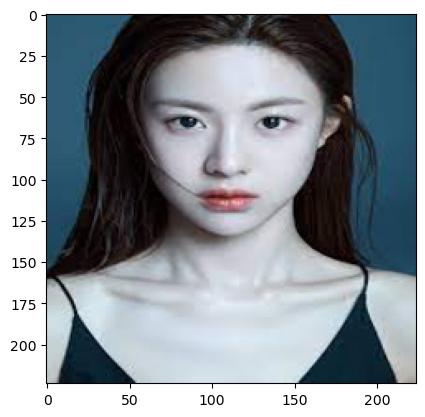

In [8]:
plt.imshow(train_go[0])

In [9]:
# 문제데이터 생성(1200개 이미지 데이터 생성)
X = np.concatenate([train_go, train_ggo, train_fox, train_pick])

In [10]:
# 정답 데이터 생성
# 고윤정 : 0, 꼬부기 : 1, 여우 : 2, 피카츄 : 3
y = np.array([0] * 400 + [1] * 400 + [2] * 400 + [3] * 400)

In [11]:
print(X.shape)
print(y.shape)

(1600, 224, 224, 3)
(1600,)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=71)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1280, 224, 224, 3)
(320, 224, 224, 3)
(1280,)
(320,)


#### NPZ(Numpy Zip) 
- 배열 데이터를 압축해서 저장한 파일 형식

In [14]:
np.savez_compressed('animals.npz',
                   X_train = X_train,
                   X_test = X_test,
                   y_train = y_train,
                   y_test = y_test
                   )